<font color='blue'>
    <font size = 5>
        You have been given the role of a business analyst for an E-Commerce company and have been asked to prepare a basic report on the data. Follow the steps below for preparation of the report. 

Before you start analysing the data, it is always a good practice to see the size of the data, its features and feature types. If the data set is big, it is not possible to print out all the records. 
    </font>
####  Note: Use the markdown feature of Python to explain your answer.
    

## Load the necessary libraries. Import and load the dataset with a name ECom_Data .

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 10

In [3]:
# Get the Data

ECom_Data=pd.read_csv("E-Commerce.csv")



<font color='blue'>
    <font size = 5>
        We have read the data and stored the data in "ECom_Data" variable </font>

## Q 1.	To get familiar with the data
## a)	Print out the first 10 and the last 10 records of the data. (2 marks)
## b)	How many rows and columns are present in the dataset? Use any two different methods to extract this information. (2 + 2 + 2 marks)
## c)	How many object data types are there? (1 mark)
## d)	Is there any Boolean data type? (1 mark) 
#### Note: Use the markdown feature of Python to explain your answer.


#### Ans 1 a)

In [4]:
print(ECom_Data.head(10))
print(ECom_Data.tail(10))

                   Customer_uniq_id Region  Order_Date Expected_Delivery_Date  \
0  e71017e224688489edfe856f2308806d  East   24-10-2021             25-10-2021   
1  6286847ee2da18f587503db49511c539  East   24-10-2021             25-10-2021   
2  0686fec9b70e5039583a38119ca0c835   West  24-10-2021             25-10-2021   
3  ea2406dc597bee2abb6b867fa668501f   West  24-10-2021             25-10-2021   
4  5935ed077915347dc695744df68c565c  East   03-09-2021             04-09-2021   
5  89fcdddaad50084e395d0928a7426afe  East   03-09-2021             04-09-2021   
6  b9b183aa18d3a721d2ac23e7184525b0  East   03-09-2021             04-09-2021   
7  dee64864c0419bec80fbbb94d19bc40d  East   03-09-2021             04-09-2021   
8  595f55f2c1293f07ea9ec9fa2bb39f46  East   03-09-2021             04-09-2021   
9  547b6585272473ae006bcfbdb47b6ae0   West  26-08-2021             27-08-2021   

  Delivered_Date                                       product_name  \
0     25-10-2021  Indcrown Net Embroi

#### Ans 1 b)

In [5]:
print(f'Method One : {ECom_Data.shape}')
print(f'Method Two : {len(ECom_Data), len(ECom_Data.loc[0, :])}')

Method One : (8906, 17)
Method Two : (8906, 17)


#### Ans  1 c)

In [6]:
dytpe_count = len(ECom_Data.dtypes[ECom_Data.dtypes == 'object'])
print(f'There are {dytpe_count} object datatypes')

There are 14 object datatypes


### Ans 1 d)

In [7]:
dytpe_count = len(ECom_Data.dtypes[ECom_Data.dtypes == 'bool'])
print(f'There are {dytpe_count} boolean datatypes')

There are 0 boolean datatypes


In [8]:
'''
for key, value in zip(ECom_Data.columns, ECom_Data.iloc[0,:]):
    print(f"{key} : {value}")
'''

'\nfor key, value in zip(ECom_Data.columns, ECom_Data.iloc[0,:]):\n    print(f"{key} : {value}")\n'

<font color='blue'>
    <font size = 5>
 Once you are familiar with the data, you may decide that not all features are of use to you and you may want to delete the non-informative features (columns)</font>

## Q 2.	Eliminating the non-informative columns.
## a)	Drop the columns product_specifications and description. (2 marks) 
## b)	Which method or function is used to permanently delete the columns mentioned in part (a)? Write the code explicitly (2 marks)
### Note: Use the markdown feature of Python to explain your answer.


### Ans 2 a)

In [9]:
print(ECom_Data.drop(['product_specifications'], axis=1).columns, len(ECom_Data.drop(['product_specifications'], axis=1).columns))
print(ECom_Data.columns, len(ECom_Data.columns))


Index(['Customer_uniq_id', 'Region', 'Order_Date', 'Expected_Delivery_Date',
       'Delivered_Date', 'product_name', 'product_main_category',
       'product_subcategory', 'product_category_filter',
       'product_category_subfilter', 'product_unique ID', 'retail_price',
       'discounted_price', 'product_rating', 'Brand', 'description'],
      dtype='object') 16
Index(['Customer_uniq_id', 'Region', 'Order_Date', 'Expected_Delivery_Date',
       'Delivered_Date', 'product_name', 'product_main_category',
       'product_subcategory', 'product_category_filter',
       'product_category_subfilter', 'product_unique ID', 'retail_price',
       'discounted_price', 'product_rating', 'Brand', 'product_specifications',
       'description'],
      dtype='object') 17


### Ans 2 b)

In [10]:
ECom_Data.drop(['product_specifications'], axis=1, inplace=True)
print(ECom_Data.columns, len(ECom_Data.columns))

Index(['Customer_uniq_id', 'Region', 'Order_Date', 'Expected_Delivery_Date',
       'Delivered_Date', 'product_name', 'product_main_category',
       'product_subcategory', 'product_category_filter',
       'product_category_subfilter', 'product_unique ID', 'retail_price',
       'discounted_price', 'product_rating', 'Brand', 'description'],
      dtype='object') 16


<font color='blue'>
    <font size = 5>
        The next steps in this project involves summarization of data at various levels and visualization. Apparently, such simple steps are very useful to get an overall sense of the data.
    </font>

## Q 3. Here we summarize the data at Brand level.
## a) How many unique Brand are there? (2 marks)
## b) Note that each Brand contains multiple products. Show the average product_rating within each Brand (2 marks)


### Ans 3 a)

In [11]:
brands = pd.unique(ECom_Data['Brand'])
print(f'There are {len(brands)} unique brands')


There are 2571 unique brands


### Ans 3 b)

In [12]:

mean_product_ratings = [ECom_Data[ECom_Data['Brand'] == brand]['product_rating'].mean() for brand in brands]
for brand, rating in zip(brands, mean_product_ratings):
    print(f'Brand :{brand}, Rating : {round(rating, 2)}')

Brand :Indcrown, Rating : 3.75
Brand :Shopmania, Rating : 3.14
Brand :Tiara Diaries, Rating : 3.0
Brand :KAJCI, Rating : 5.0
Brand :Packman, Rating : 4.0
Brand :Pick Pocket, Rating : 1.0
Brand :Angelfish, Rating : 4.0
Brand :Oye, Rating : 1.5
Brand :Nuride, Rating : 2.0
Brand :OM SHIVAKRITI, Rating : 1.0
Brand :3A AUTOCARE, Rating : 3.27
Brand :Rapter, Rating : 1.0
Brand :Roadster, Rating : 3.72
Brand :HRS, Rating : 2.0
Brand :Vermello, Rating : 1.0
Brand :Ligans NY, Rating : 3.0
Brand :Elegance, Rating : 5.0
Brand :Liza, Rating : 3.0
Brand :Sathiyas, Rating : 1.0
Brand :Eurospa, Rating : 2.0
Brand :SANTOSH ROYAL FASHION, Rating : 3.0
Brand :CASEDEAL, Rating : 3.17
Brand :Mario Gotze, Rating : 5.0
Brand :Jaipur Print, Rating : 3.33
Brand :Shilpi, Rating : 3.0
Brand :Babeezworld, Rating : 2.82
Brand :Redbag, Rating : 2.0
Brand :Proence, Rating : 3.0
Brand :Slim, Rating : 3.13
Brand :Skanders, Rating : 1.0
Brand :Regular, Rating : 3.18
Brand :Skinny Fit, Rating : 3.0
Brand :ezyPRNT, Rati

## Q 4. Next we study the main categories of the products.

## a) Create an appropriate plot to show the count of items ordered for each product_main_category. (6 marks).

### Hint: Create a bar chart titled "Product Category type" where product_main_category are on x-axis and counts are on y-axis.

### Note: Both axis labels, i.e. the names of the product_main_category and counts must be clearly legible. 

## b) From the plot identify for which two product_main_category(s)  maximum and minimum orders were placed. (2 marks)

## c) Write code to print out the top 5 product_main_category(s)  in descending order? (3 marks

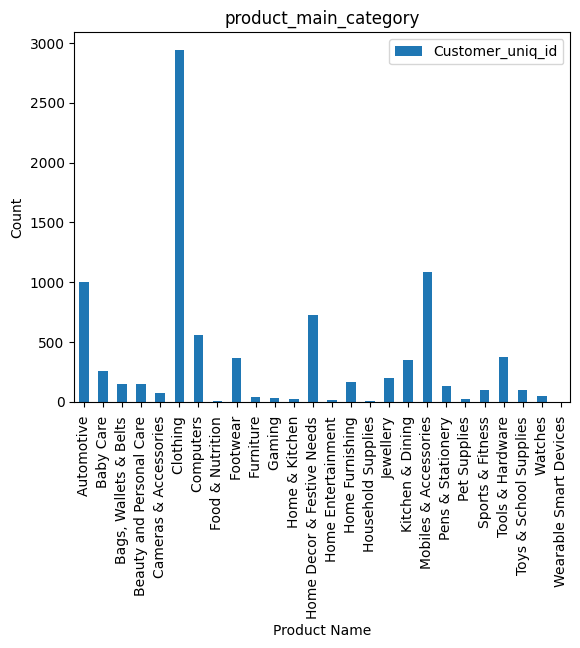

In [59]:
#print(ECom_Data.columns)
#ECom_Data.head(5)
unique_products = pd.unique(ECom_Data['product_main_category'])
    
# ECom_Data[ECom_Data['product_main_category']
axes = ECom_Data.groupby(['product_main_category']).count().iloc[:,0].plot.bar(title='product_main_category', xlabel='Product Name', ylabel='Count')
axes.legend()

In [61]:
print(ECom_Data.groupby(['product_main_category']).count().iloc[:,0].nlargest(2))
print(ECom_Data.groupby(['product_main_category']).count().iloc[:,0].nsmallest(2))
print(ECom_Data.groupby(['product_main_category']).count().iloc[:,0].nsmallest(5))

product_main_category
Clothing                  2943
Mobiles & Accessories     1084
Name: Customer_uniq_id, dtype: int64
product_main_category
Wearable Smart Devices     1
Food & Nutrition           2
Name: Customer_uniq_id, dtype: int64
product_main_category
Wearable Smart Devices      1
Food & Nutrition            2
Household Supplies          4
Home Entertainment         17
Pet Supplies               20
Name: Customer_uniq_id, dtype: int64


### Ans 4 a)

### Ans 4 b)

### Ans 4 c)

<font color='blue'>
    <font size = 5>
    In E-commerce, both the retailers (here brands) and the company have to make profit to sustain in the business. 
    The E-Commerce company has the following rule for computing their own revenue: </font> 
    
####     The company charges  
####  (i) 25% on the orders having final price (discounted price) greater than 600

#### (ii) 15% on the orders having final price (discounted price) greater than 350 but less than or equal to 600

#### (iii) 10% on the orders having final price (discounted price) greater than 100 but less than or equal to 350

#### (iv) Otherwise, 5% on the final price (discounted price)    </font> 

## Q 5. Find the Total Revenue generated by the E-Commerce company over all orders placed. (6 marks)

#### Hint: Calculate revenue of E-commerce company using the conditions mentioned above and then do the total (sum) of all to get total Revenue. 

### Ans 5

In [70]:
prices = ECom_Data['discounted_price']
revenue = []
for price in prices:
    if price > 600:
        revenue.append(price * .25)
    elif 350 < price <= 600:
        revenue.append(price * .25)
    elif 100 < price <= 350:
        revenue.append(price * .10)
    else:
        revenue.append(price * .05)
ECom_Data['Revenue'] = revenue
print(f'Total Revenue : { ECom_Data["Revenue"].sum()}')


Total Revenue : 2348960.65


<font color='blue'>
    <font size = 5>
    Now you need to find the revenue for each retailer (Brand)
    </font>

## Q6.Calculate the total BrandRevenue and list the top 10 Brand having maximum revenue in descending order (6 marks)
#### Hint: Total BrandRevenue is BrandRevenue which is generated after all the deductions. Also, BrandRevenue is different from the E-Commerce company's revenue.
#### Brand Revenue is the discounted price minus the Revenue (generated using the conditions given above Q5)


### Ans 6

In [73]:
ECom_Data.groupby(['Brand'])['Revenue'].sum().nlargest(10)

Brand
Allure Auto     166154.75
GAGA             79130.00
Slim             66366.50
DailyObjects     60660.00
Diviniti         47705.00
Enthopia         41048.75
Regular          35926.55
TheLostPuppy     34292.75
Asus             33080.50
Springwel        29659.50
Name: Revenue, dtype: float64

<font color='blue'>
    <font size = 5>
Let us now investigate multiple features for each product to determine any pattern.
</font>

## Q 7. Compare prices for each product.

## a)	Draw boxplots of retail_price & discounted_price. (3 marks)

## b)	 Are there any outliers? (Yes/No) (1mark)

## c)	Create a scatterplot of retail_price (x-axis) and discounted_price (y-axis) (3 marks)


### Ans 7 a)

### Ans 7 b)

### Ans 7 c)

<font color='blue'>
    <font size = 5>
    The next steps will enable to study brand-level information.
    </font>

## Q 8. Create a new dataframe to include the Brand specific information as stated:
## i.	total number of orders placed per Brand
## ii.	total retail_price per Brand
## iii.	total discounted_price per Brand, and 
## iv.	total BrandRevenue generated per Brand. 

## Also, draw a pairplot using these four features. (6 marks)


### Ans 8

<font color='blue'>
    <font size = 5>
    The E-Commerce company operate in multiple regions. It is important to understand its performance in each region.
    </font>

## Q 9.Compare performance regionwise

## a)	Draw a lineplot for the monthly Revenue of E-Commerce Company for each region separately.  (4 marks) 

## b)	Identify the best and the worst performing months for each region. (2 marks)

#### Note: Only those days with actual orders(Order_Date) placed are present in the dataset. Assuming there were no orders on other days

### Ans 9 a)

### Ans 9 b)

<font color='blue'>
    <font size = 5>
    Congratulations! You have learnt how to approach a complex data and extract information out of it. 
    </font>